# Text Analytics for FTSE A50: Update 1



This report is to give you an update on the progress of the project from Jun 04 to Jun 10. 


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


### Project Target:

Collect and use news or any relevant text data for predictions of 
the stock returns of FTSE China A50 components.


### Highlights

1. Hypothesis for the past week: The overall sentiment of today's Xinwenlianbo 新闻联播 might be predictive to the future return of some stocks.


2. Tentative conclusion: The sentiment of today's Xinwenlianbo is not likely to be linearly associated with the future returns of the 12 of the FTSE China A50 components examined. 


3. Possible explanations for the poor results: 
    
    - The sentiment scores are not accurate
    
    - Xinwenlianbo seldom boardcast negative news or company specific news in China. The sentiment of the news may not be informative.
    
    - The 12 stocks examined happen to be indifferent to the sentiment of the Xinwenlianbo
    
    
4. Next step (Tentative):
    
    - Use more advanced sentiment calculation packages
    
    - Keywords extraction and matching in Xinwenlianbo
    
    - Web-crawling company-specific news


## 1. Hypothesis for the past week

The overall sentiment of today's Xinwenlianbo 新闻联播 might be predictive to the future return of some stocks.


### 1.1. Motivation

China stock market is highly policy-oriented, so are Chinese investors. That's why there might be some occasional abnormal phenonena in Chinese stock market because investors might sense the investment opportunites based on government actions or official statements. Xinwenlianbo (新闻联播), in particular, is an offical channel for government to convey their messages to the public. Many people believe by carefully interpreting these messages, they can get the "tips" from the government. Therefore, by analysing the news of Xinwenlianbo, we might be able to guess the market behaviours of the investors, and therefore, the return of some stocks.


## 2 Data Source

### 2.1. Text Data

Xinwenlianbo text script from 2013-01-01 to 2018-12-31. Here is a sample of Xinwenlianbo text script on 2017-01-01:

In [2]:
import pandas as pd
import numpy as np

In [3]:
xwlbText = pd.read_csv('df_sent.csv')
xwlbText[['date', 'title', 'content']].head()

,date,title,content
0,2017-07-01,庆祝香港回归祖国20周年大会暨香港特别行政区第五届政府就职典礼隆重举行 习近平出席并发表重要讲话,庆祝香港回归祖国20周年大会暨香港特别行政区第五届政府就职典礼1日上午在香港会展中心隆重举行...
1,2017-07-01,庆祝香港回归祖国20周年文艺晚会在香港举行 习近平出席观看,南海明珠风采依然，香港特别行政区昂扬奋进。中共中央总书记、国家主席、中央军委主席习近平30日...
2,2017-07-01,习近平会见林郑月娥和香港特别行政区新任行政 立法 司法机构负责人,国家主席习近平1日上午在香港会见了刚刚就职的香港特别行政区行政长官林郑月娥。习近平首先对林郑...
3,2017-07-01,习近平出席《深化粤港澳合作 推进大湾区建设框架协议》签署仪式,《深化粤港澳合作 推进大湾区建设框架协议》1日上午在香港签署，国家主席习近平出席签署仪式。在...
4,2017-07-01,习近平考察香港重要基础设施建设项目,国家主席习近平1日上午在香港特别行政区行政长官林郑月娥陪同下，考察港珠澳大桥香港段建设工地和...


### 2.2. Market Data

Daily close prices and daily volumes of FTSE China A50 components from 2013-01-01 to 2018-12-31. To simplify my analysis, I only use 12 of them which have a complete price history throughout this period, they are：

    600519SH Kweichou Moutai
    601800SH China Communications Construction
    601939SH China Construction Bank Corp
    601668SH China State Construction Engineering 
    601288SH Agricultural Bank of China
    601398SH Industrial and Commercial Bank of China
    002304SZ Jiangsu Yanghe Bre
    600028SH China Petroleum & Chemical Corp
    601328SH BankCOMM
    600016SH China Minsheng Banking
    601988SH Bank of China
    601601SH China Pacific Insurance (Group) Co
    
Obviously, they do not cover all the industries in A50 and might be overly concentrated on the financial sector which might lead to bias in the later stage.

**Daily Closes**

In [4]:
pm = pd.read_csv('price_matrix.csv')
pm.head()


,trade_date,600519SH,601800SH,601939SH,601668SH,601288SH,601398SH,002304SZ,600028SH,601328SH,600016SH,601988SH,601601SH
0,2013-01-04,206.94,5.40,4.70,3.95,2.89,4.22,93.01,6.96,5.06,7.98,2.96,22.96
1,2013-01-07,204.29,5.39,4.73,3.89,2.87,4.23,90.80,6.88,5.06,8.32,2.95,22.56
2,2013-01-08,210.84,5.31,4.65,3.82,2.84,4.14,95.80,6.91,4.98,8.19,2.94,21.90
3,2013-01-09,216.45,5.20,4.60,3.80,2.82,4.15,102.94,6.90,4.91,8.18,2.93,21.89
4,2013-01-10,214.50,5.16,4.62,3.79,2.82,4.23,102.35,7.04,4.90,8.13,2.94,21.73


**Daily Volume**

In [5]:
vm = pd.read_csv('volume_matrix.csv')
vm.head()

,trade_date,600519SH,601800SH,601939SH,601668SH,601288SH,601398SH,002304SZ,600028SH,601328SH,600016SH,601988SH,601601SH
0,2013-01-04,58370.34,424476.78,741390.46,2049371.84,3680172.59,1184135.34,68294.43,366308.94,1860521.60,2851528.31,608343.58,469969.60
1,2013-01-07,41271.39,198372.74,405054.18,1456178.76,1391158.99,820376.83,55671.00,314249.62,980276.83,2101507.95,399265.88,144542.16
2,2013-01-08,65286.98,224625.86,520824.39,1382833.22,1038673.72,935226.55,82267.03,515568.84,726593.55,1514305.52,454213.33,239880.57
3,2013-01-09,53749.32,311333.62,412724.11,1284129.21,1017743.21,720871.17,96682.12,358576.21,851054.28,1289603.87,401221.82,205719.15
4,2013-01-10,30527.86,249558.56,318895.82,1522849.24,1246764.68,789236.17,50463.77,657676.72,750362.16,1261977.35,179424.08,185389.48


## 3. Feature Extraction


### 3.1. Text Data: Sentiment Score

I rely on the package `SnowNLP` to help me calculate the sentiment score for each piece of news. Details can be found in its [GitHub](https://github.com/isnowfy/snownlp). I would come back to this point later.


In [6]:
xwlbText.tail()

,Unnamed: 0,date,title,content,sentiment
32369,1285,2014-03-31,搜寻MH370航班：10架飞机10艘舰船全力搜索,今天是马航370航班失联第24天，各方派出10架飞机10艘舰船全力以赴继续搜索。今天，中国空...,1.000000e+00
32370,1286,2014-03-31,外交部：中方不接受不参与菲方所提仲裁,30号菲律宾外长德尔罗萨里奥宣布菲已于当天向中菲南海争议国际仲裁庭提交诉状。对此外交部发言人...,9.999998e-01
32371,1287,2014-03-31,人民日报评论员文章：滥用国际法律程序的图谋不可能得逞——评菲律宾在南海问题上之妄诉,明天出版的人民日报将发表评论员文章：《滥用国际法律程序的图谋不可能得逞——评菲律宾在南海问题...,7.269071e-01
32372,1288,2014-03-31,新交规实施一年 违法数量大幅下降,修订后的《机动车驾驶证申领和使用规定》，大幅提高了机动车驾驶人违法记分分值。据公安部交管局统...,1.712088e-09
32373,1289,2014-03-31,太湖文化论坛巴黎会议今天开幕,以“丝绸之路-中西方文化交流的永恒通途”为主题的太湖文化论坛2014年巴黎会议今天开幕。会议...,1.000000e+00


Then, I take the average of the sentiments scores on the same day which represents the Xinwenlianbo Sentiment on that particular day.

Lastly, I use `from sklearn.preprocessing import StandardScaler`to standardize each sentiment score. 


In [7]:
df_daily_sent = pd.read_csv('df_daily_sent.csv')
df_daily_sent.head()

,date,sentiment,std_sent
0,2013-01-01,0.735273,-1.457792
1,2013-01-02,0.769119,-1.097721
2,2013-01-03,0.673181,-2.118385
3,2013-01-04,0.745696,-1.346905
4,2013-01-05,0.806463,-0.700420


### 3.2. Market Data: Future Return

For each stock, I calculate:

    return_1d_after: the return after 1 day
    return_3d_after: the return after 3 days
    return_5d_after: the return after 5 days
    return_7d_after: the return after 7 days

In [8]:
future = pd.read_csv('NWLBsentiment_future_return.csv')
future.iloc[:,[2,14,26, 38]].head()

,601800SH_ra1,601800SH_ra3,601800SH_ra5,601800SH_ra7
0,-0.001852,-0.037037,-0.066667,-0.038889
1,-0.014842,-0.042672,-0.037106,-0.057514
2,-0.020716,-0.050847,-0.022599,-0.058380
3,-0.007692,-0.001923,-0.023077,-0.019231
4,-0.023256,0.005814,-0.031008,0.025194


### 3.3. Market Data: Future Percentage Change of Volume

For each stock, I calculate:

    volume_1d_after: the volume percentage change after 1 day
    volume_3d_after: the volume percentage change after 3 days
    volume_5d_after: the volume percentage change after 5 days
    volume_7d_after: the volume percentage change after 7 days


In [9]:
future.iloc[:,[50,62,74, 86]].head()

,601800SH_va1,601800SH_va3,601800SH_va5,601800SH_va7
0,-0.532665,0.386010,-0.120501,0.168598
1,0.132342,-0.198421,0.086969,0.121208
2,0.386010,-0.120501,0.168598,-0.490799
3,-0.198421,0.086969,0.121208,0.498474
4,-0.120501,0.168598,-0.490799,0.669362


## 4. Findings

### 4.1. The Sentiment of Xinwenlianbo is very noisy

If we believe the `SnowNLP`'s sentiment scoring is reliable, then we can plot daily sentiment score to see if we find any patterns. However, it turns out that it is very difficult to spot a pattern, just like white noise.

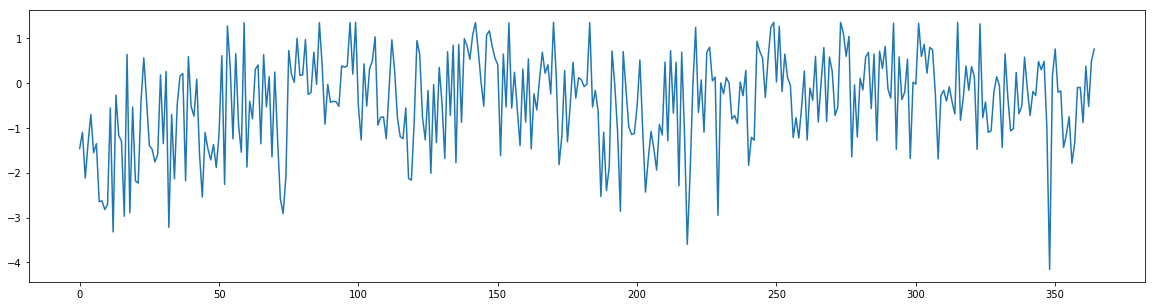

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_daily_sent[['std_sent']][:365])


### 4.2. The sentiment of XInwenlianbo has little correlation with the price and volume change of the stocks examined

I calculate the correlation between the sentiment score and all the future features created in Section 3.2 and Section 3.3. Unfortunately, the correlations between between are very week. It might not worth to be a feature to predict the future returns.

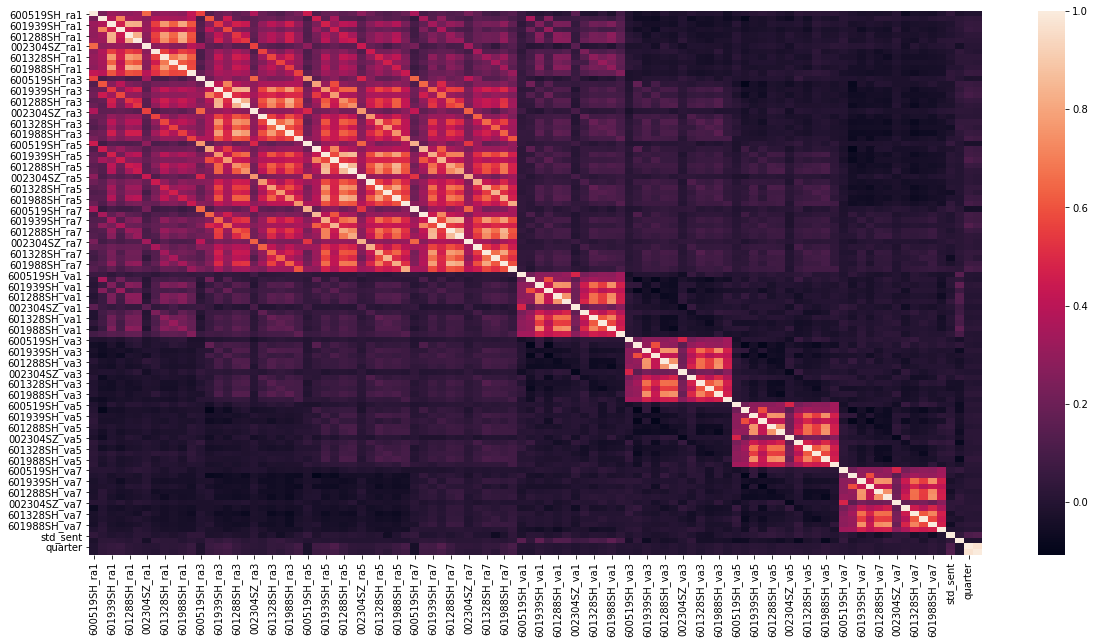

In [11]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(future.corr())

## 5. Possible Reason for the poor results


### 5.1. The sentiment scores are not reliable


After checking a small sample of the sentiment scores calculted by the package `SnowNLP`, I realised these sentiment scores are not necessarily accurate, let alone informative. If you can read Chinese, you can also have a look:
    
        

For example, the following piece of news is given a negative sentiment with which I don't agree

In [12]:
xwlbText.iloc[10,3]

'全国通关一体化今天正式实施全国海关风险防控中心和税收征管中心今天正式启用，标志着全国通关一体化全面实施，企业可以在任意地点进行报关，通关时间和成本将大幅下降。全国铁路暑期运行图今起实施今天凌晨起，全国铁路实施暑期运行图，未来两个月，计划增开中长途旅客列车46对，北京南站7月6日起将加开到雄安新区的2对动车组列车。长征五号遥二火箭将于7月2日发射国防科工局今天宣布，长征五号遥二火箭确定将于7月2日在海南文昌航天发射场发射。今天下午四点三十分长五遥二火箭开始进行推进剂加注。长江发生今年第一号洪水受连续强降雨影响，今天8点长江发生今年第一号洪水，同时洞庭湖水位超警，国家防总已启动防汛三级应急响应，派出8个工作组协助地方抗洪，已调度长江三峡等重点水利工程消减下泄流量，减轻下游压力。亚投行获穆迪最高信用评级国际信用评级机构穆迪日前发布公告，给予亚洲基础设施投资银行Ａａａ的最高信用评级。穆迪表示，亚投行拥有稳固的治理架构、在对亚投行当前和未来的信用状况进行整体评估后得出了这一评级结果。'

Here is an example of news that have negative sentiment: 

In [13]:
xwlbText[['content', 'sentiment']][xwlbText['sentiment'] < 0.5].sample(20)

,content,sentiment
23413,近日，石家庄向社会公开发布了有史以来最严厉的60条大气污染防治措施，对建筑施工、煤场等扬尘大...,8.467726e-04
10769,让灾区群众吃上一顿热乎饭，是当地政府和救灾部队共同的心愿。今天，四川雅安芦山地震灾区的部分群...,4.916869e-01
3241,布隆迪军人解散政府 总统下落不明13号，布隆迪前情报部门负责人 尼永巴雷将军通过私营电台宣称...,3.114365e-07
16780,应国务院总理李克强邀请，捷克共和国总理索博特卡将于11月22号至27号对中国进行正式访问，并...,5.082464e-02
25051,国家主席习近平将于8月16日出席在南京举行的第二届夏季青年奥林匹克运动会开幕式。应习近平主席...,7.889092e-03
444,扶贫专项资金直接关系到国家扶贫政策是否能惠及贫困群众，但是就有人胆敢把黑手伸向这笔钱。按照中...,5.962885e-02
18567,连日来，由于持续强降雨，秘鲁多地遭遇严重洪灾，目前已经导致75人死亡，全国约一半地区进入紧急...,3.285997e-05
19242,国家电网今天发布消息，受持续高温天气影响，北京、河北、山东等18个省级电网用电负荷创历史新高...,3.403530e-06
17871,记者从公安部获悉，春节期间，全国公安机关按照公安部部署要求，落实各项节日安保措施，有力维护了...,6.653607e-07
8972,江苏盐城龙卷风冰雹特别重大灾害发生后，各方迅速赶到现场，全力抢险救灾。这些手机拍摄的视频，记...,1.808267e-01


Here is an example of news that have positve sentiment:

In [14]:
xwlbText[['content', 'sentiment']][xwlbText['sentiment'] > 0.5].sample(20)

,content,sentiment
28458,财政部、中国人民银行、国资委今天发布通知，表示要积极采取措施，支持资本市场稳定发展。财政部发...,1.000000
10394,9月30日晚，国务院在人民大会堂举行国庆招待会，热烈庆祝中华人民共和国成立六十七周年。习近平...,1.000000
30411,中共中央政治局常委、中央书记处书记刘云山17日下午在北京会见了由党主席、前总理阿披实率领的泰...,1.000000
8967,俄罗斯总统普京将于6月25日对中国进行国事访问，日前普京在圣彼得堡接受新华社社长蔡名照独家专...,0.999999
30502,西藏首座大型水电站今天正式发电华能藏木水电站首台机组今天正式投产发电，这也是西藏第一座大型水...,1.000000
767,记者从25日在京召开的全国人大常委会“一法一决定”执法检查组第一次全体会上获悉，全国人大常委...,0.999396
29877,河北省组建产学研一体化的农业技术创新团队，让一项项农业先进技术走出实验室，变成农田里的丰收样...,0.999999
22541,国务院常务会议昨天要求，疏通金融服务实体经济的“血脉”。人民银行、银监会今天表示，将增加对三...,1.000000
24347,近日，中共中央印发了《建立健全惩治和预防腐败体系2013-2017年工作规划》，并发出通知，...,1.000000
22647,海关总署党组认真落实党风廉政建设主体责任，从群众反映问题突出的窗口小事抓起，明确各级一把手是...,0.999938


### 5.2. The tone of Xinwenlianbo is generally generally positive

As we all know, Xinwenlianbo is an important propaganda tool for the government. Generally speaking, they only report positive domestics news or negative domestic events that have been successully solved. Therefore, even we believe the sentiment scores are correct, the information in the sentiment is very limited. 

In [15]:
xwlbText[['content', 'sentiment']].sample(100).sample(20)

,content,sentiment
12219,法国国防部网站19号报道说，从18号晚至19号晚，法军战机共出动了10多架次，继续轰炸小镇贾...,0.903040
29434,近日，中共中央办公厅、国务院办公厅印发了《关于推动国有文化企业把社会效益放在首位、实现社会效...,1.000000
2090,24日上午，国务院总理李克强在北京人民大会堂东门外广场举行仪式，欢迎德国总理默克尔对我国进行...,1.000000
15843,我国的两弹一星功勋科学家孙家栋院士参与并见证了中国航天60多年的发展。他说，党的十九大为未来...,1.000000
23456,我台“出彩人生——中国梦·我的梦”大型视频征集展播活动，今天在南京进行首次落地推广。三位梦想...,1.000000
28032,“绿色丝绸之路基金”启动由多家企业和联合国环境规划署等机构共同成立的“绿色丝绸之路基金”在北...,1.000000
28436,扫黄打非“护苗2015”行动通报一批案件全国“扫黄打非”办公室通报了“护苗2015”专项行动...,1.000000
7705,6月23日，全国政协主席俞正声在人民大会堂会见加纳副总统巴武米亚。俞正声说，中加友谊源远流长...,1.000000
4228,欧洲航天局21日宣布，美国航天局火星勘测轨道飞行器拍摄的一张火星表面图像，很可能捕捉到了日前...,0.002384
20190,生态文明建设不断提速，美丽中国迈出坚实步伐。国庆假期，人们置身于绿水青山之间，风光满目，尽情...,1.000000


### 5.3. The 12 stocks examined happen to be indifferent to the sentiment of the Xinwenlianbo

These 12 stocks that have a full history from 2013 to 2018 happen to be the strongest state-own companies in Mainland China. The sentiment of the news would not affect investors' confidence towards thess stocks

## 6. Next Step (Tentative)

Here are some tentative alternative plans for the next week. 

### 6.1. Use more advanced sentiment calculation packages

`SnowNLP` is currently the most popular sentiment calculation package for Chinese texts and one of the most important reasons is is that it is free. However, they are other paid services such as Baidu Cloud which are supposedly to be more effective.

However, I may not be able to subscribe these services if they exceed my budget.

### 6.2. Keywords extraction and matching in Xinwenlianbo

The sentiment of these carefully-worded news may not be informative, but the entities mentioned in the news should be meaningful. If the keywords in the news are also the keywords for a specific company. Then this piece of news might be relevant to that company. 


### 6.3. Web-crawling company-specific news

Instead of Xiwenlianbo, it is also suggested that to find those company-specific feeds online. These pieces news should be most relevant to the company concerned and the sentiment analysis should be less tricky than analysing Xinwenlianbo.

However, the reason I did not do this in the first place is I found most reliable news sources such as China Securities Journal and Shanghai Securities News have implemented anti-crawler mechanisms by either blocking the access or mixing random noise into the data that I have not overcome this problem. I would look for if there are other ways bypass this issue.  
